# **Import** **libraries**

In [1]:
# main libraries
import pandas as pd
import numpy as np
import time
from google.colab import drive

# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.decomposition import PCA
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the data in the CSV file using pandas
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data/CCFD.csv')
df1=pd.read_csv('/content/drive/MyDrive/data/CCFD1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284832, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.18151050443770364 %
non frauds : 99.8184894955623 %


In [7]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Frequency')

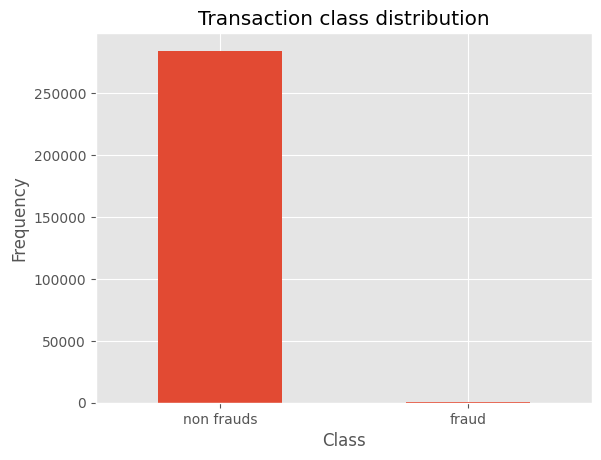

In [8]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

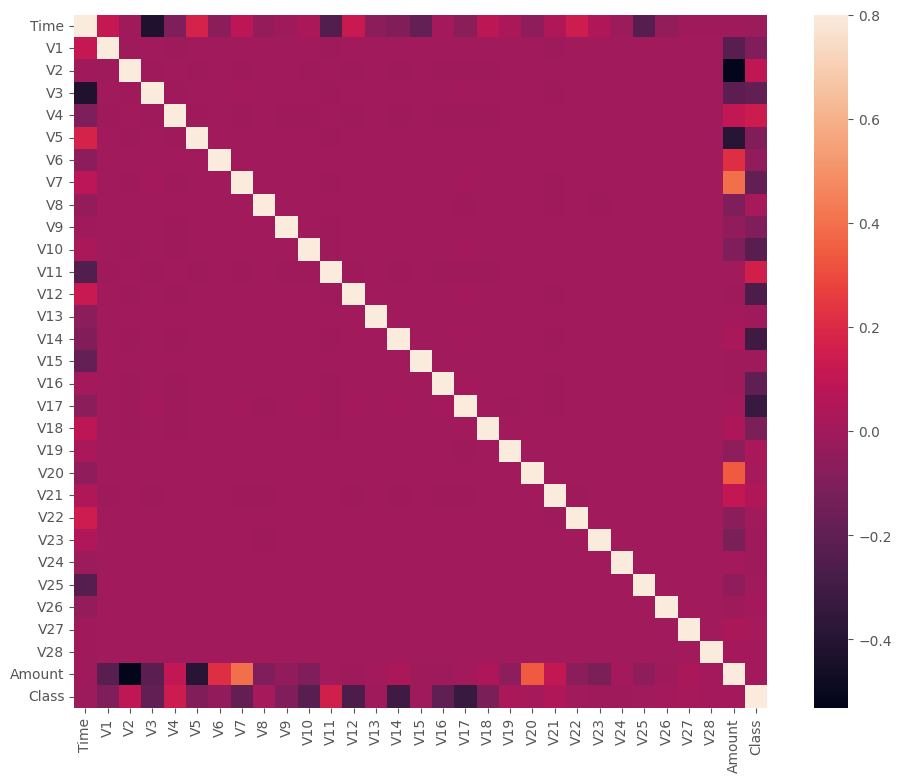

In [9]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Standardizing the features
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.245005,-1.996146
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342457,-1.996146
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160762,-1.996125
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140571,-1.996125
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073375,-1.996104


In [12]:
from sklearn.decomposition import PCA

In [13]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,1.561934,-0.652229,0
1,-1.086447,-0.284388,0
2,2.037203,1.102107,0
3,1.140322,-0.407251,0
4,1.139927,-1.325718,0


In [15]:
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
42473,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,-11.298156,...,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,1,-0.338059,-1.130442
150667,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,-15.239962,...,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,1,-0.041349,-0.019908
141260,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,1,1.694886,-0.223217
215132,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,...,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,1,2.538355,0.950545
73859,-1.514183,1.081013,-0.715141,1.096532,-0.309829,-1.094829,0.360635,0.594501,-0.903620,0.319269,...,0.741296,0.245593,0.578025,-0.630208,-0.439519,0.297238,0.074902,0,0.006590,-0.831564


Text(0, 0.5, 'Frequency')

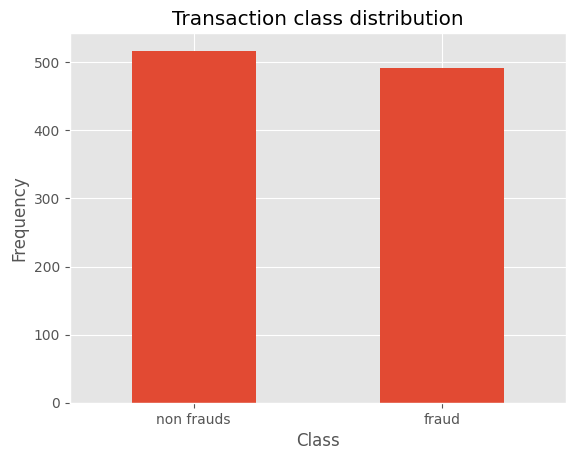

In [16]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

# **ANN**

In [17]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
import keras

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [21]:
model=Sequential()

In [22]:
# first layer
model.add(Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=30))

In [23]:
#2nd layer
model.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))

In [24]:
#3rd layer
model.add(Dense(units=1,kernel_initializer='he_normal',activation='sigmoid'))

In [25]:
# compiling!
model.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20,validation_split=0.2)

Epoch 1/20
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.0062 - val_accuracy: 0.9990
Epoch 2/20
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 3/20
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 4/20
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 5/20
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 6/20
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 7/20
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0040 - val_ac

In [27]:

output=pd.DataFrame(history.history)
output

,loss,accuracy,val_loss,val_accuracy
0,0.037574,0.989435,0.006171,0.998969
1,0.005659,0.999084,0.004830,0.999166
2,0.004554,0.999237,0.004370,0.999254
3,0.004048,0.999276,0.004171,0.999320
4,0.003722,0.999303,0.004033,0.999320
5,0.003481,0.999342,0.003964,0.999342
6,0.003292,0.999353,0.003961,0.999342
7,0.003191,0.999375,0.003928,0.999320
8,0.003075,0.999413,0.003893,0.999364
9,0.003021,0.999391,0.003838,0.999364


In [28]:

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1781/1781 [==============================] - 3s 2ms/step


In [29]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.92      0.82      0.87       113

    accuracy                           1.00     56967
   macro avg       0.96      0.91      0.93     56967
weighted avg       1.00      1.00      1.00     56967



# **ANN**

In [30]:
X=df1.drop("Class",axis=1)
y=df1["Class"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
import keras

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [34]:
generic=Sequential()

In [35]:
# first layer
generic.add(Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=30))

In [36]:
#2nd layer
generic.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))

In [37]:
#3rd layer
generic.add(Dense(units=1,kernel_initializer='he_normal',activation='sigmoid'))

In [38]:
# compiling!
generic.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
# Train the ANN
history = generic.fit(X_train, y_train, batch_size = 32, epochs = 20,validation_split=0.2)

Epoch 1/20
5697/5697 [==============================] - 17s 3ms/step - loss: 15.7447 - accuracy: 0.7107 - val_loss: 1.4280 - val_accuracy: 0.8169
Epoch 2/20
5697/5697 [==============================] - 16s 3ms/step - loss: 2.0432 - accuracy: 0.8158 - val_loss: 0.4247 - val_accuracy: 0.8807
Epoch 3/20
5697/5697 [==============================] - 17s 3ms/step - loss: 1.1676 - accuracy: 0.8669 - val_loss: 2.8122 - val_accuracy: 0.8287
Epoch 4/20
5697/5697 [==============================] - 17s 3ms/step - loss: 1.0898 - accuracy: 0.8837 - val_loss: 0.3756 - val_accuracy: 0.9104
Epoch 5/20
5697/5697 [==============================] - 17s 3ms/step - loss: 0.8646 - accuracy: 0.9014 - val_loss: 0.2080 - val_accuracy: 0.9484
Epoch 6/20
5697/5697 [==============================] - 17s 3ms/step - loss: 0.8916 - accuracy: 0.9038 - val_loss: 0.7102 - val_accuracy: 0.9155
Epoch 7/20
5697/5697 [==============================] - 16s 3ms/step - loss: 0.9218 - accuracy: 0.9063 - val_loss: 0.2698 - val_a

In [40]:

output=pd.DataFrame(history.history)
output

,loss,accuracy,val_loss,val_accuracy
0,15.744699,0.710662,1.428010,0.816931
1,2.043187,0.815768,0.424709,0.880719
2,1.167612,0.866851,2.812201,0.828671
3,1.089780,0.883720,0.375584,0.910429
4,0.864616,0.901416,0.207991,0.948434
5,0.891608,0.903847,0.710212,0.915476
6,0.921799,0.906271,0.269833,0.936476
7,0.846855,0.911817,0.254132,0.950234
8,0.744731,0.917566,0.991704,0.911417
9,0.772880,0.918334,0.172093,0.957628


In [41]:

# Predicting the test set results
y_pred = generic.predict(X_test)
y_pred = (y_pred > 0.5)

1781/1781 [==============================] - 3s 1ms/step


In [42]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     37080
           1       1.00      0.60      0.75     19887

    accuracy                           0.86     56967
   macro avg       0.91      0.80      0.83     56967
weighted avg       0.89      0.86      0.85     56967



#  **Input** **Phase**

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image
import pandas as pd

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn


In [ ]:
df10=pd.read_csv(path)
df10.head()

# ***prediction*** ***phase***

In [ ]:
Ann = model.predict(df10)
Ann1= generic.predict(df10)

In [ ]:
if(Ann<0.4 and Ann1<0.6):
      predicted="Not Fraud"
else:
      predicted="Fraud"

# **Output** **Phase**

In [ ]:
#result
print(predicted)

# **Sending mail**

In [ ]:
import smtplib
from email.message import EmailMessage
if(predicted=='Fraud'):
  server = smtplib.SMTP('smtp.gmail.com', 587)
  server.starttls()
  server.login("samforccfd2021@gmail.com", "ccfd2022")
  email: EmailMessage = EmailMessage()
  email['From'] = 'samforccfd2021@gmail.com'
  email['To'] = 'mrthiyagu2002@gmail.com'
  email['Subject'] = 'credit card transaction'
  email.set_content("a transaction was done recently if it isn't you please contact the bank if the transaction was done by you please ignore the mail .It is an auto generted mail please don't reply to this mail")
  server.send_message(email)
  print("mailsent")